# Decompose HSC observed QSO image

This notebook requires standard python libraries and the publicly available packages on github:
See https://github.com/dartoon/galight/blob/master/requirements.txt

This notebook has been tested with galight == 0.1.2

For more information, please contact me: dingxuheng@126.com

This notebook is very similar to the 'galight_HST_QSO.ipynb', only that the noise_map, PSF are input to the fittings. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: https://drive.google.com/file/d/1ZO9-HzV8K60ijYWK98jGoSoZHjIGW5Lc/view?usp=sharing
fitsFile = pyfits.open('../example_files/HSC/QSO/000017.88+002612.6_HSC-I.fits')

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

#Derive the fov noise level map:
err_data= fitsFile[3].data ** 0.5

#Calculate the zeropoint for HSC filters:
file_header0 = fitsFile[0].header
FLUXMAG0 = file_header0['FLUXMAG0']
zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.

#Load the PSF data:
PSF = pyfits.getdata('../example_files/HSC/QSO/000017.88+002612.6_HSC-I_psf.fits')

Estimating the background light ... ... ...
Plot target cut out zoom in:


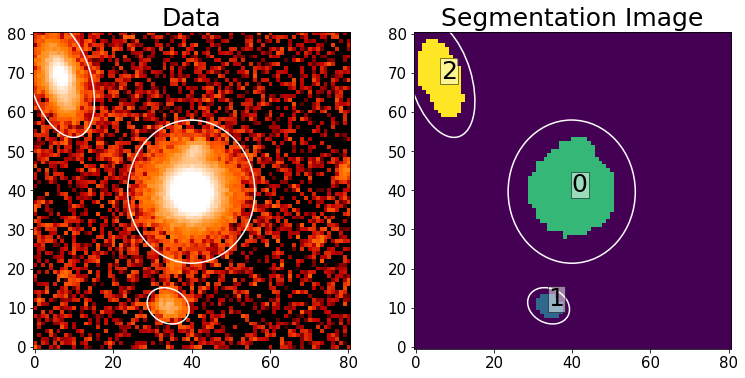

label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1  33.97233640859878 10.483390376980072 ... 23.189933440707634          nan
    0 39.878512652743495  39.65420140516439 ...  935.9413749959695          nan
    3 6.4403712688177945  68.56712756371142 ... 162.45549646159748          nan
Input directly the a obj that used to create MASK, use space between each id:
1


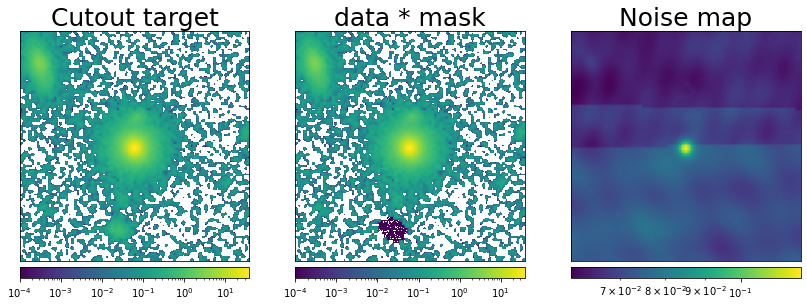

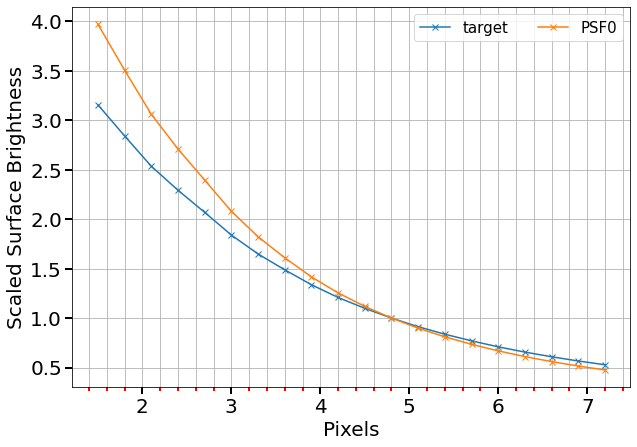

The PSF is not a box size, will cut it to a box size automatically.
The data_process is ready to go to pass to FittingSpecify!


In [2]:
from galight.data_process import DataProcess

#RA, DEC information of the QSO:
QSO_RA, QSO_DEC = 0.07452999800443649, 0.4368380010128021
data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [QSO_RA, QSO_DEC],
                           pos_type = 'wcs', header = header,
                          rm_bkglight = True, if_plot=False, zp = zp)

#Generate the fitting materials
data_process.generate_target_materials(radius=None, create_mask = True, nsigma=2.8,
                                      exp_sz= 1.5, npixels = 15, if_plot=True)

#Manually input the PSF:
data_process.PSF_list = [PSF]

# Compare the 1D profile of all the components.
data_process.profiles_compare(norm_pix = 5, if_annuli=False, y_log = False,
                  prf_name_list = (['target'] + ['PSF{0}'.format(i) for i in range(len(data_process.PSF_list))]) )


#Check if all the materials is given, if so to pass to the next step.
data_process.checkout() #Check if all the materials is known.

The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


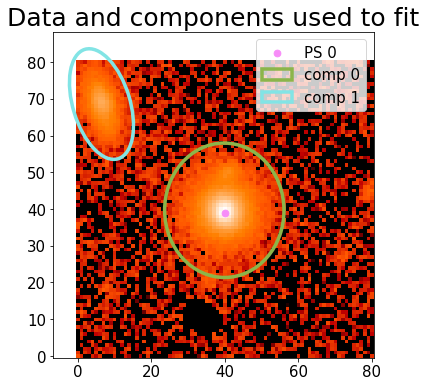

In [3]:
#Start to produce the class and params for lens fitting.
#For more details, see notebook galight_HST_QSO.ipynb
from galight.fitting_specify import FittingSpecify
fit_sepc = FittingSpecify(data_process)
fit_sepc.prepare_fitting_seq(point_source_num = 1)
#Using following line: want to fix Sersic_n as 4 for the source_id = 0, and if want to fix the QSO and host center:
# fit_sepc.prepare_fitting_seq(point_source_num = 1, fix_n_list= [[0,4]], fix_center_list = [[0,0]])

#Plot the initial settings for fittings. 
fit_sepc.plot_fitting_sets()

fit_sepc.build_fitting_seq()

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
Max iteration reached! Stopping.
-1.4151615613670536 reduced X^2 of best position
-4574.509747119001 logL
6465.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 0.9149669176805052, 'n_sersic': 1.51792548218602, 'e1': -0.07004707024486408, 'e2': 0.07214209364915927, 'center_x': 0.044632538877859444, 'center_y': -0.06079099944531457}, {'amp': 1, 'R_sersic': 1.0511844951814335, 'n_sersic': 2.6733947920455177, 'e1': -0.42165790108825985, 'e2': 0.27130945391493655, 'center_x': 5.636505283212457, 'center_y': 4.856553231639628}] lens light result
[{'ra_image': array([0.02335095]), 'dec_image': array([-0.11769762]), 'point_amp': array([1.])}] point source result
{} special param result
65.19072103500366 time used for  PSO


100%|█████████████████████████████████████████| 300/300 [03:50<00:00,  1.30it/s]


Computing the MCMC...
Number of walkers =  140
Burn-in iterations:  100
Sampling iterations (in current run): 300
230.87034702301025 time taken for MCMC sampling
296.371 total time taken for the overall fitting (s)
============ CONGRATULATION, YOUR JOB WAS SUCCESSFUL ================ 
Start transfering the Params to fluxs...
10000 MCMC samplers in total, finished translate: 0
10000 MCMC samplers in total, finished translate: 1000
10000 MCMC samplers in total, finished translate: 2000
10000 MCMC samplers in total, finished translate: 3000
10000 MCMC samplers in total, finished translate: 4000
10000 MCMC samplers in total, finished translate: 5000
10000 MCMC samplers in total, finished translate: 6000
10000 MCMC samplers in total, finished translate: 7000
10000 MCMC samplers in total, finished translate: 8000
10000 MCMC samplers in total, finished translate: 9000


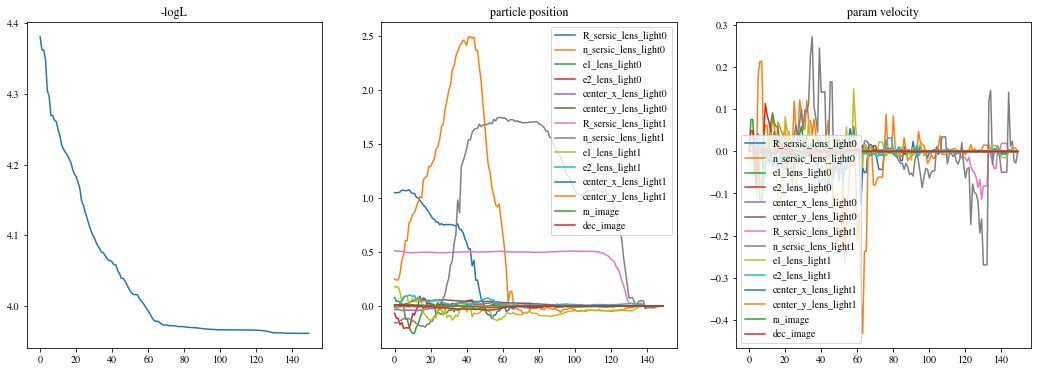

<Figure size 432x288 with 0 Axes>

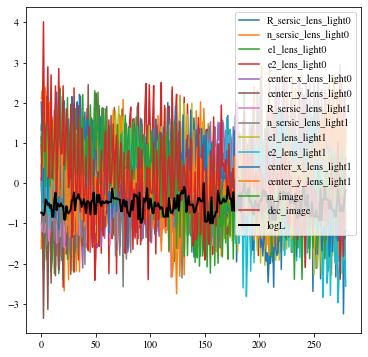

-1.411731016948641 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  1.411731016948641


/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:41: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:89: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:124: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:522: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data - model), origin='lower', vmin=v_min, vmax=v_max,


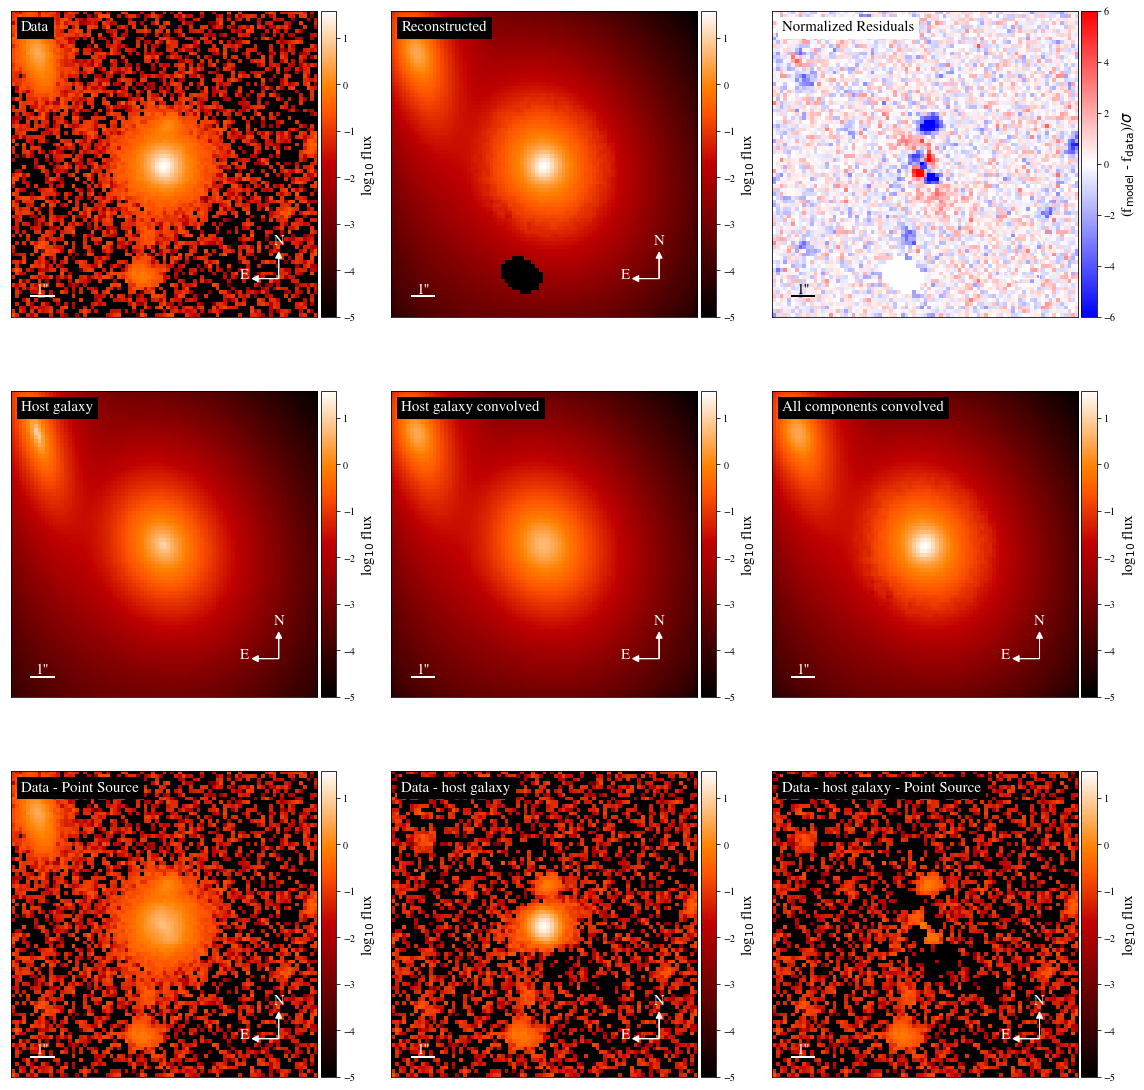

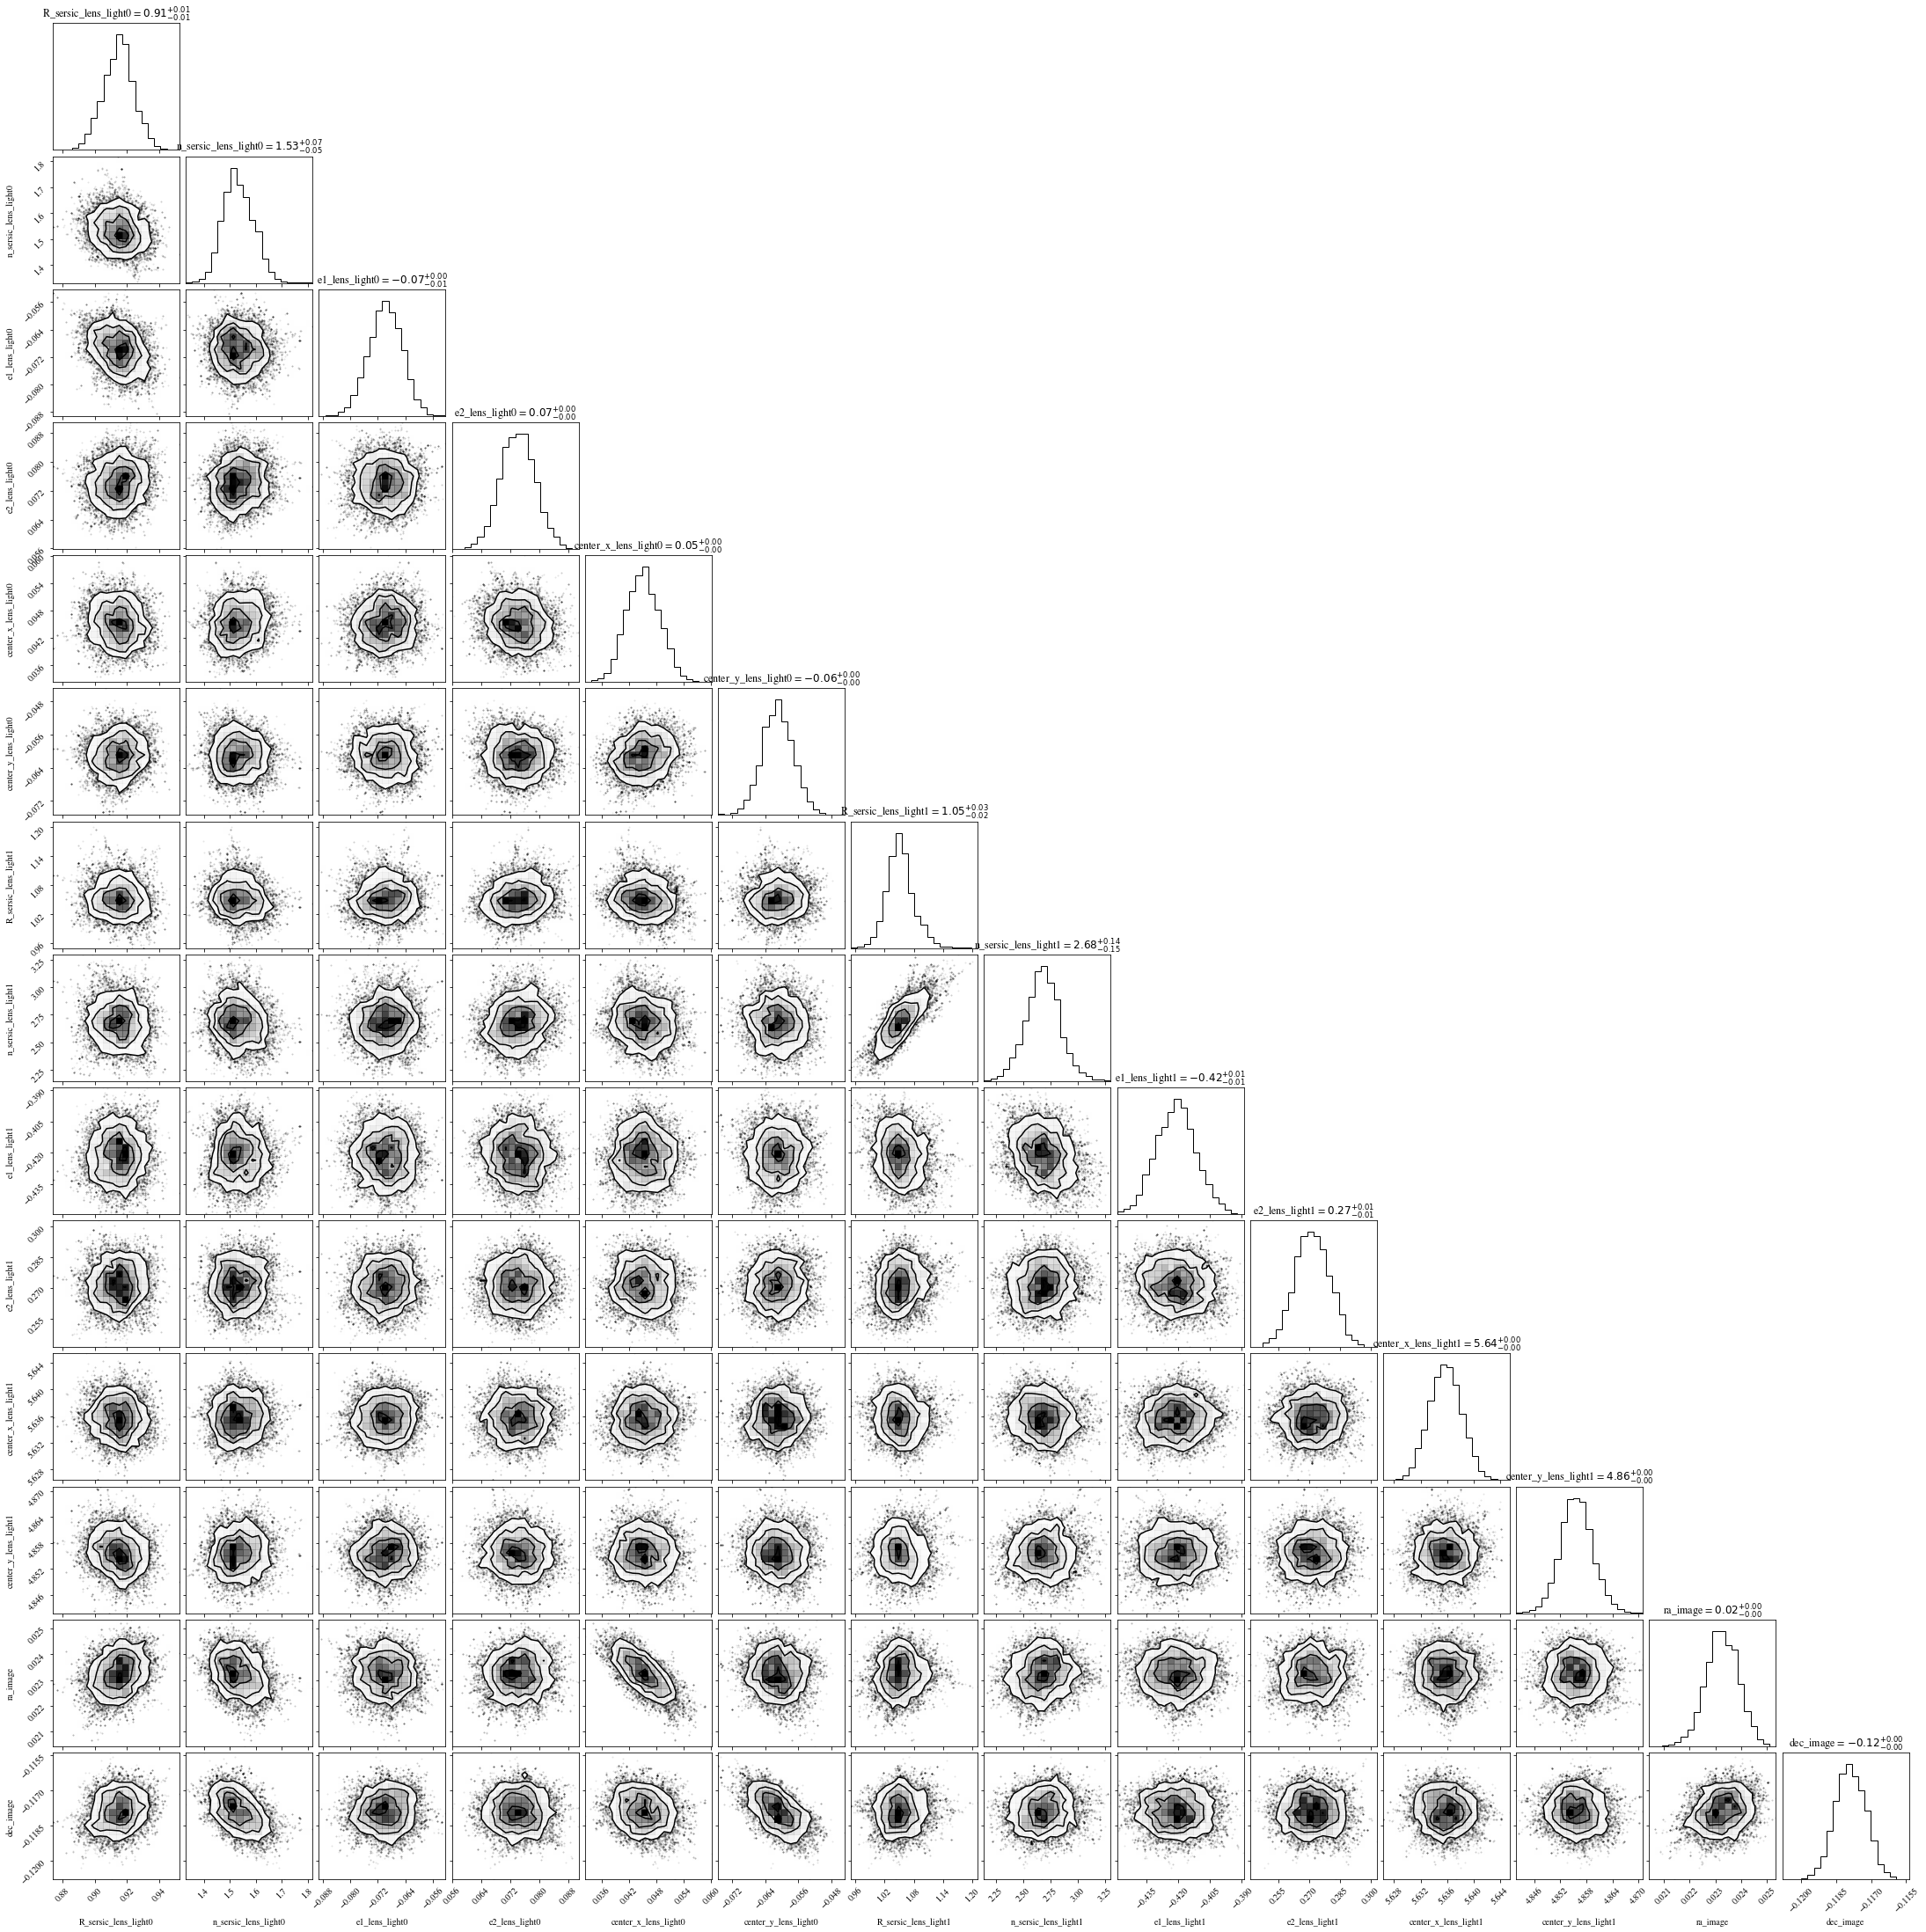

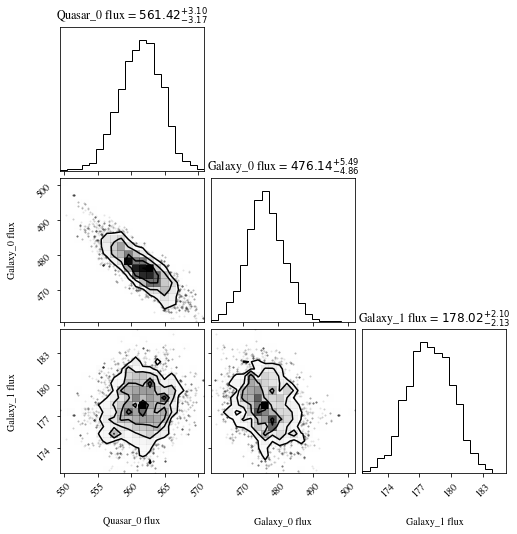

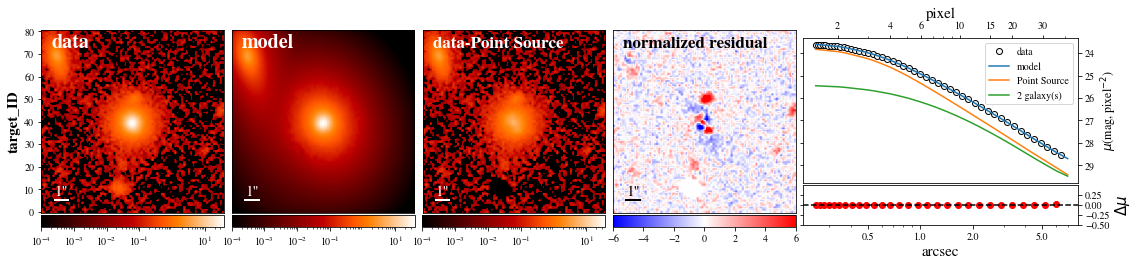

In [4]:
#Setting the fitting method and run.
from galight.fitting_process import FittingProcess

#Pass fit_sepc to FittingProcess,
# savename: The name of the saved files.    
fit_run = FittingProcess(fit_sepc, savename = 'HSC_result', fitting_level='norm')

#Setting the fitting approach and Run: 
#     algorithm_list: The fitting approaches that would be used: e.g. ['PSO', 'PSO', 'MCMC']
#     setting_list: The detailed setting for the fitting: e.g. [[0.8, 50, 50], [0.8, 50, 50], [50, 100, 10, 0.1]]
#     -for PSO:
#         input template: {'sigma_scale': 0.8, 'n_particles': 50, 'n_iterations': 50}
#     -for MCMC:
#         input template: {'n_burn': 50, 'n_run': 100, 'walkerRatio': 10, 'sigma_scale': .1}
#     if setting_list = [None, None, None], default values would be given 
fit_run.run(algorithm_list = ['PSO', 'MCMC'], setting_list = [None, None])

# Plot all the fitting results, including:
#         run_diag() : The convergence of the chains.
#         model_plot(): The model plot (by lenstronomy)
#         plot_params_corner(): The mcmc corner for all the chains (MCMC should be peformed) 
#         plot_flux_corner(): The flux corner for all the component (MCMC should be peformed)
#         plot_final_qso_fit() or plot_final_galaxy_fit(): Plot the overall plot (data, model, data-ps, resudal, 1D profile)
fit_run.plot_all()


#Save the fitting class as pickle format:
#     Note, if you use python3 (or 2), load with python3 (or 2)
fit_run.dump_result(savedata=False)  #You can set savedata= True to save the data_process_class, otherwise, it will be removed in pickle.

In [5]:
#Load the saved fitting class, the fitting_run_result would be the loaded as fit_run() in previous fittings.
import pickle
picklename = 'HSC_result.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
#fitting_run_result.plot_final_qso_fit()
fitting_run_result.final_result_galaxy

[{'amp': 48.271326420219914,
  'R_sersic': 0.9192989827918888,
  'n_sersic': 1.510361295787905,
  'e1': -0.07312812063205845,
  'e2': 0.07355783257996407,
  'center_x': 0.04210059390304162,
  'center_y': -0.06177210286585788,
  'phi_G': 1.176632514802405,
  'q': 0.8120487295812266,
  'flux_sersic_model': 585.0545670981181,
  'flux_within_frame': 474.55701015538483,
  'magnitude': 20.30927901705572},
 {'amp': 31.33231504545322,
  'R_sersic': 1.0417818036929773,
  'n_sersic': 2.6174349255583493,
  'e1': -0.419833995539759,
  'e2': 0.2676849006388808,
  'center_x': 5.636664810509988,
  'center_y': 4.854123212216601,
  'phi_G': 1.286993026979544,
  'q': 0.33519243061119763,
  'flux_sersic_model': 629.2699328777132,
  'flux_within_frame': 177.55809526534946,
  'magnitude': 21.37664880616817}]

### Galight can help you measure the asymetry of the target using the saved pickle file:

Estimating the background light ... ... ...
Zeropoint value is not provided, use 27.0 to calculate magnitude.


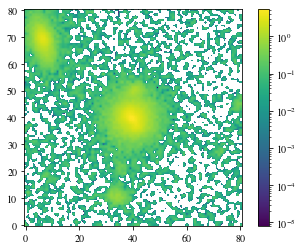

Measuring the position for minimized asy...
Optimization terminated successfully.
         Current function value: 67.098809
         Iterations: 79
         Function evaluations: 149
The pixel position that gives you the minimized asy: [-0.23105088 -0.38002548]
Plot the minimized abs residual:


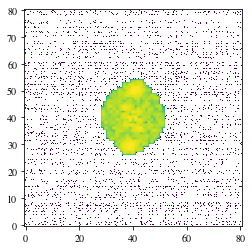

Plot the region to estiamte the background asymmetry:


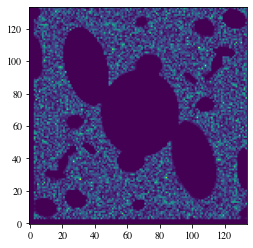

asymmetry : 0.08139862124006995


In [7]:
from galight.tools.asymmetry_tools import Measure_asy
from galight.tools.astro_tools import plt_fits
import pickle

picklename = 'HSC_result.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
if_remeasure_bkg = True

#By default, fit_run.dump_result() will removed the 'data_process_class' to save space. 
#However, the if_remeasure_bkg=True will extend the stamp size using data_process_class,
#so if you want to re-measure bkg, using the following to redefine data_process:
if if_remeasure_bkg == True and hasattr(fitting_run_result.fitting_specify_class, 'data_process_class') == False:
    import astropy.io.fits as pyfits
    from galight.data_process import DataProcess
    QSO_RA, QSO_DEC = 0.07452999800443649, 0.4368380010128021
    fitsFile = pyfits.open('../example_files/HSC/QSO/000017.88+002612.6_HSC-I.fits')
    fov_image = fitsFile[1].data # check the back grounp
    header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']
    err_data= fitsFile[3].data ** 0.5
    data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [QSO_RA, QSO_DEC],
                               pos_type = 'wcs', header = header,
                              rm_bkglight = True, if_plot=False, zp = None)
    fitting_run_result.fitting_specify_class.data_process_class = data_process

asy_class = Measure_asy(fitting_run_result, seg_cal_reg = 'or', obj_id=0)  
#in last line, seg_cal_reg='or' means the segm map will be extended. Try also 'and'.
asy_class.img -= asy_class.fitting_process_class.image_ps_list[0]  #Point source will be removed first.

plt_fits(asy_class.img,colorbar=True)
asy_class.asy_segm(mask_type='segm')  #Try also mask_type='aper'
pos = asy_class.find_pos()
print('The pixel position that gives you the minimized asy:', pos["x"])
asy = asy_class.cal_asymmetry(rotate_pix = pos["x"], if_remeasure_bkg=if_remeasure_bkg, 
                              if_plot=True, if_plot_bkg=True)
print('asymmetry :', asy)